# High-energy LB phase transitions

In [50]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import MultipleLocator
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
import matplotlib
%matplotlib inline

In [51]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
FONT_SIZE = 20
TITLE_SIZE = 20

## MoS2-0

In [52]:
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
THSPC_DIR = "theta"

# Change as necessary
M1_th_min, M1_th_max, M1_ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
M1_ntheta = int(M1_ntheta)
KPT = 'Gamma'
print(f"{M1_ntheta} angles from {M1_th_min} to {M1_th_max}")

# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_modes.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
M1_phonons = np.load(ppath)
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
M1_dataset = np.load(path)
M1_nmodes = M1_dataset.shape[1]
print("Dataset shape:", M1_dataset.shape)
print("Phonons shape:", M1_phonons.shape)
print("Number of modes:", M1_nmodes)
M1_rssz = M1_phonons.shape[-2]
M1_thetas = np.linspace(M1_th_min, M1_th_max, M1_ntheta)

101 angles from 0.01 to 10.0
Dataset shape: (101, 61)
Phonons shape: (101, 2, 61, 1521, 3)
Number of modes: 61


In [53]:
# Find indices of LB modes, manually
M1_LB1_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB1_idxs.npy')

M1_LB2_idxs = np.zeros(M1_ntheta).astype(int)
M1_LB2_idxs[23:] = 23
M1_LB2_idxs[22:23] = 29
M1_LB2_idxs[:22] = 35

M1_LB3_idxs = np.zeros(M1_ntheta).astype(int)
M1_LB3_idxs[58:] = 27
M1_LB3_idxs[25:58] = 29
M1_LB3_idxs[24:25] = 35
M1_LB3_idxs[:24] = 41

np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB2_idxs.npy', M1_LB2_idxs)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB3_idxs.npy', M1_LB3_idxs)

# Extract the mode list from the indices
M1_LB1_modes = np.zeros(M1_ntheta)
M1_LB2_modes = np.zeros(M1_ntheta)
M1_LB3_modes = np.zeros(M1_ntheta)
M1_LB1_phonons = np.zeros((M1_ntheta, 2, M1_rssz))
M1_LB2_phonons = np.zeros((M1_ntheta, 2, M1_rssz))
M1_LB3_phonons = np.zeros((M1_ntheta, 2, M1_rssz))

for i in range(M1_ntheta):
    M1_LB1_modes[i] = M1_dataset[i, M1_LB1_idxs[i]]
    M1_LB2_modes[i] = M1_dataset[i, M1_LB2_idxs[i]]
    M1_LB3_modes[i] = M1_dataset[i, M1_LB3_idxs[i]]
    
    M1_LB1_phonons[i] = M1_phonons[i, :, M1_LB1_idxs[i], :, -1]
    M1_LB2_phonons[i] = M1_phonons[i, :, M1_LB2_idxs[i], :, -1]
    M1_LB3_phonons[i] = M1_phonons[i, :, M1_LB3_idxs[i], :, -1]

np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB2_modes.npy', M1_LB2_modes)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB3_modes.npy', M1_LB3_modes)

In [54]:
# Compute the proportion of positive and negative modes
M1_plus_1 = np.mean(M1_LB1_phonons > 0, axis=-1).T
M1_minus_1 = np.mean(M1_LB1_phonons < 0, axis=-1).T
M1_plus_2 = np.mean(M1_LB2_phonons > 0, axis=-1).T
M1_minus_2 = np.mean(M1_LB2_phonons < 0, axis=-1).T
M1_plus_3 = np.mean(M1_LB3_phonons > 0, axis=-1).T
M1_minus_3 = np.mean(M1_LB3_phonons < 0, axis=-1).T

# Take the "best" proportion of the two configurations
M1_breath_score_1 = np.max([M1_plus_1[0] + M1_minus_1[1], M1_plus_1[1] + M1_minus_1[0]], axis=0) / 2
M1_breath_score_2 = np.max([M1_plus_2[0] + M1_minus_2[1], M1_plus_2[1] + M1_minus_2[0]], axis=0) / 2
M1_breath_score_3 = np.max([M1_plus_3[0] + M1_minus_3[1], M1_plus_3[1] + M1_minus_3[0]], axis=0) / 2

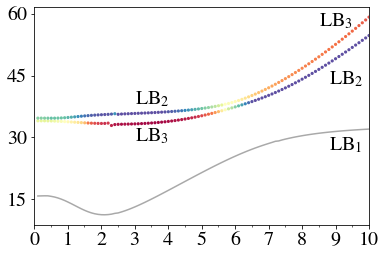

In [65]:
# Plot LB modes
fig, ax = plt.subplots()
plt.rc('font', size=13)
plt.set_cmap('Spectral')

M1_scores = [M1_breath_score_2[1:], M1_breath_score_3[1:]]
M1_min_, M1_max_ = min(0.5, np.min(M1_scores)), np.max(M1_scores)
ax.plot(M1_thetas[1:], M1_LB1_modes[1:], c='darkgrey')
S2 = ax.scatter(M1_thetas[1:], M1_LB2_modes[1:], 
                c=M1_breath_score_2[1:], edgecolor='none', s=10)
S2.set_clim(M1_min_, M1_max_)
S3 = ax.scatter(M1_thetas[1:], M1_LB3_modes[1:], 
                c=M1_breath_score_3[1:], edgecolor='none', s=10)
S3.set_clim(M1_min_, M1_max_)

plt.text(8.5, 57, r'LB$_3$', fontsize=FONT_SIZE)
plt.text(8.8, 43, r'LB$_2$', fontsize=FONT_SIZE)
plt.text(3, 29, r'LB$_3$', fontsize=FONT_SIZE)
plt.text(3, 38, r'LB$_2$', fontsize=FONT_SIZE)
plt.text(8.8, 27, r'LB$_1$', fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)

# cb = fig.colorbar(S2, ax=ax, ticks=np.linspace(0.4, 1, 7))
# plt.xlabel(r'$\theta$ ($^\circ$)')
# plt.ylabel(r'$\omega$ $(cm^{-1})$', fontsize=TITLE_SIZE)
plt.xlim((0, M1_th_max))
plt.xticks(np.arange(10+1), fontsize=FONT_SIZE)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(15))
props = dict(boxstyle='round', facecolor='lightblue', alpha=1)
# ax.set_title(r"MoS$_2$", fontsize=TITLE_SIZE)
plt.savefig("/Users/jonathanlu/Documents/data_mlph/MoS2_transition.pdf", bbox_inches='tight')
plt.show()

### Discussion
If we look at the modes atom by atom in `thspc_finder.ipynb` everything is moving coherently within each layer, but the Sulfurs also obtain some divergence at the non-LB regions. At the LB regions it looks like perfect breathing.

## Gr

In [56]:
DIRNAME = "tvGr"

# Change as necessary
M2_th_min, M2_th_max, M2_ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
M2_ntheta = int(M2_ntheta)
KPT = 'Gamma'
print(f"{M2_ntheta} angles from {M2_th_min} to {M2_th_max}")

# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_modes.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
M2_phonons = np.load(ppath)
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
M2_dataset = np.load(path)
M2_nmodes = M2_dataset.shape[1]
print("Dataset shape:", M2_dataset.shape)
print("Phonons shape:", M2_phonons.shape)
print("Number of modes:", M2_nmodes)
M2_rssz = M2_phonons.shape[-2]
M2_thetas = np.linspace(M2_th_min, M2_th_max, M2_ntheta)

101 angles from 0.01 to 10.0
Dataset shape: (101, 61)
Phonons shape: (101, 2, 61, 1521, 3)
Number of modes: 61


In [57]:
# Find indices of LB modes, manually
M2_LB1_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB1_idxs.npy')

M2_LB2_idxs = np.zeros(M2_ntheta).astype(int)
M2_LB2_idxs[91:] = 15
M2_LB2_idxs[21:91] = 17
M2_LB2_idxs[14:21] = 23
M2_LB2_idxs[:14] = 35

M2_LB3_idxs = np.zeros(M2_ntheta).astype(int)
M2_LB3_idxs[53:] = 23
M2_LB3_idxs[14:53] = 29
M2_LB3_idxs[:14] = 41

np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB2_idxs.npy', M2_LB2_idxs)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB3_idxs.npy', M2_LB3_idxs)

# Extract the mode list from the indices
M2_LB1_modes = np.zeros(M2_ntheta)
M2_LB2_modes = np.zeros(M2_ntheta)
M2_LB3_modes = np.zeros(M2_ntheta)
M2_LB1_phonons = np.zeros((M2_ntheta, 2, M2_rssz))
M2_LB2_phonons = np.zeros((M2_ntheta, 2, M2_rssz))
M2_LB3_phonons = np.zeros((M2_ntheta, 2, M2_rssz))

for i in range(M2_ntheta):
    M2_LB1_modes[i] = M2_dataset[i, M2_LB1_idxs[i]]
    M2_LB2_modes[i] = M2_dataset[i, M2_LB2_idxs[i]]
    M2_LB3_modes[i] = M2_dataset[i, M2_LB3_idxs[i]]
    
    M2_LB1_phonons[i] = M2_phonons[i, :, M2_LB1_idxs[i], :, -1]
    M2_LB2_phonons[i] = M2_phonons[i, :, M2_LB2_idxs[i], :, -1]
    M2_LB3_phonons[i] = M2_phonons[i, :, M2_LB3_idxs[i], :, -1]

np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB2_modes.npy', M2_LB2_modes)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Gr_LB3_modes.npy', M2_LB3_modes)

In [58]:
# Compute the proportion of positive and negative modes
M2_plus_1 = np.mean(M2_LB1_phonons > 0, axis=-1).T
M2_minus_1 = np.mean(M2_LB1_phonons < 0, axis=-1).T
M2_plus_2 = np.mean(M2_LB2_phonons > 0, axis=-1).T
M2_minus_2 = np.mean(M2_LB2_phonons < 0, axis=-1).T
M2_plus_3 = np.mean(M2_LB3_phonons > 0, axis=-1).T
M2_minus_3 = np.mean(M2_LB3_phonons < 0, axis=-1).T

# Take the "best" proportion of the two configurations
M2_breath_score_1 = np.max([M2_plus_1[0] + M2_minus_1[1], M2_plus_1[1] + M2_minus_1[0]], axis=0) / 2
M2_breath_score_2 = np.max([M2_plus_2[0] + M2_minus_2[1], M2_plus_2[1] + M2_minus_2[0]], axis=0) / 2
M2_breath_score_3 = np.max([M2_plus_3[0] + M2_minus_3[1], M2_plus_3[1] + M2_minus_3[0]], axis=0) / 2

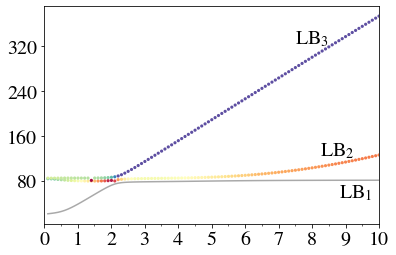

In [68]:
# Plot LB modes
fig, ax = plt.subplots()
plt.rc('font', size=13)
plt.set_cmap('Spectral')

M2_scores = [M2_breath_score_2[1:], M2_breath_score_3[1:]]
M2_min_, M2_max_ = min(0.5, np.min(M2_scores)), np.max(M2_scores)
ax.plot(M2_thetas[1:], M2_LB1_modes[1:], c='darkgrey')
S2 = ax.scatter(M2_thetas[1:], M2_LB2_modes[1:], 
                c=M2_breath_score_2[1:], edgecolor='none', s=10)
S2.set_clim(M2_min_, M2_max_)
S3 = ax.scatter(M2_thetas[1:], M2_LB3_modes[1:], 
                c=M2_breath_score_3[1:], edgecolor='none', s=10)
S3.set_clim(M2_min_, M2_max_)

plt.text(7.5, 325, r'LB$_3$', fontsize=FONT_SIZE)
plt.text(8.25, 125, r'LB$_2$', fontsize=FONT_SIZE)
plt.text(8.8, 50, r'LB$_1$', fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(80))
props = dict(boxstyle='round', facecolor='lightblue', alpha=1)
# ax.set_title("Gr", fontsize=TITLE_SIZE)

# cb = fig.colorbar(S2, ax=ax, ticks=np.linspace(0.4, 1, 7))
# plt.title(r"Analogous $\theta$-dynamic LB modes of Gr at " + log_name)
# plt.xlabel(r'$\theta$ ($^\circ$)')
# plt.ylabel(r'$\omega$ $(cm^{-1})$')
plt.xlim((0, M2_th_max))
plt.xticks(np.arange(10+1),fontsize=FONT_SIZE)

plt.savefig("/Users/jonathanlu/Documents/data_mlph/Gr_transition.pdf", bbox_inches='tight')
plt.show()

### Discussion
Unlike MoS2, there is no real transition happening in graphene. Instead, DLB1 breathes until it stops at ~2 degrees, at which point no one is really breathing. Note that the magnitude of DLB1 in the yellow region is close to 0, so it has negligible effect. Hence Gr does not have interesting high-LB dynamics.

## MoSe2-WSe2

In [60]:
DIRNAME = "tvHet"

# Change as necessary
M3_th_min, M3_th_max, M3_ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
M3_ntheta = int(M3_ntheta)
KPT = 'Gamma'
print(f"{M3_ntheta} angles from {M3_th_min} to {M3_th_max}")

# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_modes.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
M3_phonons = np.load(ppath)
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
M3_dataset = np.load(path)
M3_nmodes = M3_dataset.shape[1]
print("Dataset shape:", M3_dataset.shape)
print("Phonons shape:", M3_phonons.shape)
print("Number of modes:", M3_nmodes)
M3_rssz = M3_phonons.shape[-2]
M3_thetas = np.linspace(M3_th_min, M3_th_max, M3_ntheta)

101 angles from 0.01 to 10.0
Dataset shape: (101, 61)
Phonons shape: (101, 2, 61, 1521, 3)
Number of modes: 61


In [61]:
# Find indices of LB modes, manually
M3_LB1_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Het_LB1_idxs.npy')
M3_LB2_idxs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Het_LB2_idxs.npy')

M3_LB3_idxs = np.zeros(M3_ntheta).astype(int)
M3_LB3_idxs[38:] = 15
M3_LB3_idxs[37:38] = 17
M3_LB3_idxs[34:37] = 21
M3_LB3_idxs[33:34] = 23 # 21 ?
M3_LB3_idxs[28:33] = 23
M3_LB3_idxs[28:29] = 29 # 23 ?
M3_LB3_idxs[25:28] = 29
M3_LB3_idxs[:25] = 35

M3_LB4_idxs = np.zeros(M3_ntheta).astype(int)
M3_LB4_idxs[35:] = 29
M3_LB4_idxs[34:35] = 29 # 35 ?
M3_LB4_idxs[28:34] = 35 
M3_LB4_idxs[:28] = 41

np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Het_LB3_idxs.npy', M3_LB3_idxs)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Het_LB4_idxs.npy', M3_LB4_idxs)

# Extract the mode list from the indices
M3_LB1_modes = np.zeros(M3_ntheta)
M3_LB2_modes = np.zeros(M3_ntheta)
M3_LB3_modes = np.zeros(M3_ntheta)
M3_LB4_modes = np.zeros(M3_ntheta)
M3_LB1_phonons = np.zeros((M3_ntheta, 2, M3_rssz))
M3_LB2_phonons = np.zeros((M3_ntheta, 2, M3_rssz))
M3_LB3_phonons = np.zeros((M3_ntheta, 2, M3_rssz))
M3_LB4_phonons = np.zeros((M3_ntheta, 2, M3_rssz))

for i in range(M3_ntheta):
    M3_LB1_modes[i] = M3_dataset[i, M3_LB1_idxs[i]]
    M3_LB2_modes[i] = M3_dataset[i, M3_LB2_idxs[i]]
    M3_LB3_modes[i] = M3_dataset[i, M3_LB3_idxs[i]]
    M3_LB4_modes[i] = M3_dataset[i, M3_LB4_idxs[i]]
    
    M3_LB1_phonons[i] = M3_phonons[i, :, M3_LB1_idxs[i], :, -1]
    M3_LB2_phonons[i] = M3_phonons[i, :, M3_LB2_idxs[i], :, -1]
    M3_LB3_phonons[i] = M3_phonons[i, :, M3_LB3_idxs[i], :, -1]
    M3_LB4_phonons[i] = M3_phonons[i, :, M3_LB4_idxs[i], :, -1]

np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Het_LB3_modes.npy', M3_LB3_modes)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/Het_LB4_modes.npy', M3_LB4_modes)

In [62]:
# Compute the proportion of positive and negative modes
M3_plus_3 = np.mean(M3_LB3_phonons > 0, axis=-1).T
M3_minus_3 = np.mean(M3_LB3_phonons < 0, axis=-1).T
M3_plus_4 = np.mean(M3_LB4_phonons > 0, axis=-1).T
M3_minus_4 = np.mean(M3_LB4_phonons < 0, axis=-1).T

# Take the "best" proportion of the two configurations
M3_breath_score_3 = np.max([M3_plus_3[0] + M3_minus_3[1], M3_plus_3[1] + M3_minus_3[0]], axis=0) / 2
M3_breath_score_4 = np.max([M3_plus_4[0] + M3_minus_4[1], M3_plus_4[1] + M3_minus_4[0]], axis=0) / 2

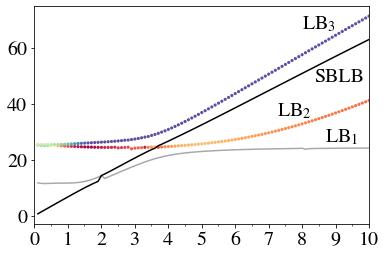

In [70]:
# Plot LB modes
fig, ax = plt.subplots()
plt.rc('font', size=13)
plt.set_cmap('Spectral')

M3_scores = [M3_breath_score_3[1:], M3_breath_score_4[1:]]
M3_min_, M3_max_ = min(0.5, np.min(M3_scores)), np.max(M3_scores)

ax.plot(M3_thetas[1:], M3_LB1_modes[1:], c='darkgrey')
ax.plot(M3_thetas[1:], M3_LB2_modes[1:], c='black')

S3 = ax.scatter(M3_thetas[1:], M3_LB3_modes[1:], 
                c=M3_breath_score_3[1:], edgecolor='none', s=10)
S3.set_clim(M3_min_, M3_max_)
S4 = ax.scatter(M3_thetas[1:], M3_LB4_modes[1:], 
                c=M3_breath_score_4[1:], edgecolor='none', s=10)
S4.set_clim(M3_min_, M3_max_)

plt.text(8, 67, r'LB$_3$', fontsize=FONT_SIZE)
plt.text(7.25, 36, r'LB$_2$', fontsize=FONT_SIZE)
plt.text(8.7, 26.5, r'LB$_1$', fontsize=FONT_SIZE)
plt.text(8.35, 48, r'SBLB', fontsize=FONT_SIZE)

# cb = fig.colorbar(S2, ax=ax, ticks=np.linspace(0.4, 1, 7))
# cb.ax.tick_params(labelsize=FONT_SIZE) 
plt.yticks(fontsize=FONT_SIZE)
plt.xlim((0, M3_th_max))
plt.xticks(np.arange(10+1), fontsize=FONT_SIZE)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(20))
props = dict(boxstyle='round', facecolor='lightblue', alpha=1)
# ax.set_title(r"MoSe$_2$-WSe$_2$", fontsize=TITLE_SIZE)

plt.savefig("/Users/jonathanlu/Documents/data_mlph/Het_transition.pdf", bbox_inches='tight')
plt.show()